Cahier IPython en cours d'élaboration....

    v1.0 2019/06/13 BA  MAJ par Benjamin AILLOUD (stage L2 informatique)    
    v1.1 2019/07/01 JLC MAJ des explications

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

# A/ Machine Learning : Réseau de neurone convolutionnel

Le principe des réseaux convolutionnels est très différent de celui des réseaux denses vus précédemment.




<p style="text-align:center; font-style:italic; font-size=xx-small">
    <img src="./figures/cnn_doc.png" width="600" >
    (crédit image : JLC)
</p>

L'objectif de ce tp est de comprendre le fonctionnement d'un `réseau convolutionnel` et sa construction via l'utilisation des modules `keras` et `tensorflow`. Programmer un `réseau convolutionnel` ne diffère pas entièrement d'un `réseau dense` vu au tp précédent, le déroulement du code reste essentiellement le même : 
- Import des images depuis la banque MNIST.
- Ici, les images ne sont plus vectorisées car les réseaux convolutionnels sont compatibles avec des entées sous forme de matrices de pixels. Il subsiste une étape de traitement des données d'entrée pour rajouter les canaux de couleurs, suivie d'une étape de normalisation.
- `Hot encoding` des étiquettes pour les rendre comptaibles avec les sorties du réseau de neurones.
- Construction du modèle, entraînement.
- Analyse des résultats.

Petit rappel de cours: 
- Chaque étape de `convolution` comporte aussi une `activation` qui utilise généralement la fonction `relu`
- Un réseau de neuronne convolutionnel se termine par une couche dense

#  B/ Environnement Python de travail

<span style="color:brown;font-family:arial;font-size:large"> 
    Le travail qui suit doit se faire dans un <span style="font-weight:bold;">environnement Python 3.6 dédié</span>
    : voir le document <span style="font-style:italic">EnvironnementPython.pdf</span> si vous n'avez pas encore créé
    d'environnement Python dédié pour le travail avec les modules Keras et tensorflow.
</span>

### Environnement Python dédié

Vérification de la version Python de l'environnement dédié : doit être 3.6.x

In [2]:
import sys
sys.version

'3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) \n[GCC 7.3.0]'

Incrustation des tracés matplotlib dans le cahier IPython et import de modules utiles :

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

#### Module Keras

Vérifier la version du module Keras (doit être 2.2.x) :    

In [4]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

#### Module tensorflow
Vérifier la version du module Keras (doit être 1.14.x) :    

In [5]:
import tensorflow as tf
tf.__version__

'1.14.0'

#### Module OpenCV
Vérifier la version du module OpenCV (doit être 3.4.x) :    

In [6]:
import cv2
cv2.__version__

'3.4.2'

# Travail à faire

## 1/ Récupération du jeu de données MNIST 

https://fr.wikipedia.org/wiki/Base_de_données_MNIST : La base de données MNIST (*Mixed National Institute of Standards and Technology*), est une base de données de chiffres écrits à la main. C'est un jeu de données très utilisé en apprentissage automatique.<br /><br />
L'ensemble des images du jeu de données MNIST contient **60000 images d'apprentissage** et **10000 images de test**, soit en tout **70000 images** de 28 x 28 pixels.

In [7]:
import tensorflow  
import keras 

# Load data from https://www.openml.org/d/554
from keras.datasets import mnist
(image_train, etiq_train), (image_test, etiq_test) = mnist.load_data()

<span style="color:blue;font-family:arial">Afficher le type des objets `image_train`, `etiq_train`, `image_test` et `etiq_test` et leurs attributs `shape` et `dtype`:</span>

In [8]:
objs = (image_train, etiq_train, image_test, etiq_test)
print(f"type de image_train : {type(image_train)}, shape: {image_train.shape}, dtype: {image_train.dtype}")
print(f"type de etiq_train  : {type(etiq_train)}, shape: {etiq_train.shape}, dtype: {etiq_train.dtype}")
print(f"type de image_test  : {type(image_test)}, shape: {image_test.shape}, dtype: {image_test.dtype}")
print(f"type de etiq_test   : {type(etiq_test)}, shape: {etiq_test.shape}, dtype: {etiq_test.dtype}")

type de image_train : <class 'numpy.ndarray'>, shape: (60000, 28, 28), dtype: uint8
type de etiq_train  : <class 'numpy.ndarray'>, shape: (60000,), dtype: uint8
type de image_test  : <class 'numpy.ndarray'>, shape: (10000, 28, 28), dtype: uint8
type de etiq_test   : <class 'numpy.ndarray'>, shape: (10000,), dtype: uint8


## 2/ 'Hot coding' des étiquettes :

In [9]:
import numpy as np
from keras.utils import np_utils 

# Normalisation des valeurs de pixel
image_train = image_train/255
image_test  = image_test/255

y_train = np_utils.to_categorical(etiq_train)
y_test  = np_utils.to_categorical(etiq_test)

L'utilisation des réseaux de convolution nécessite des `inputs` prenant en compte le nombre de `canaux de couleur`, par exemple, une image RGB possède 3 canaux de couleurs alors qu'une image en noir et blanc n'en possède qu'un.
Pour l'instant nos inputs sont en format 2 dimensions où le canal de couleur n'est pas représenté.

In [10]:
print(image_train.shape)
print(image_test.shape)

(60000, 28, 28)
(10000, 28, 28)


<span style="color:blue;font-family:arial"> 
    On rajoute la dimension du 'canal gris' :
</span> 

In [11]:
x_train = image_train.reshape((60000,28,28,1))
x_test  = image_test.reshape((10000,28,28,1))

# 3/ Construction du réseau de neurones :

## Rendre les tirages aléatoires reproductibles

Les poids d'un réseau de neurones sont initialisés par tirage aléatoire : on fixe la **graine**  du générateur `numpy.random` (*seed*) pour avoir des suites de nombres aléatoires reproductibles :

In [17]:
seed = 43
np.random.seed(seed)

<span style="color:blue;font-family:arial"> Cette fois-ci, c'est à toi de créer le **modèle** représenté dans l'image de début de tp, en utilisant le module `tensorflow`. 
    Pour créer les couches, tu dois utiliser les fonctions du module `tensorflow.keras.layers` : lit bien la doc et la description des arguments des fonctions: </span>
- **Conv2D**:<br /> 
`Première convolution`: 16 filtres, fenêtre 5$\times$5, activation : 'relu', input : (28, 28, 1)<br />
`Seconde convolution` : 32 filtres, fenêtre 5$\times$5, activation: 'relu'
- **MaxPooling2D** : Facteur de division des matrices en largeur et hauteur (2,2)
- **Dense** : Nombre de neuronne dans la couche = largeur output * hauteur output * nombre d'output de la couche précédente. <br> </br> Prendre en compte le pooling pour la taille des input !  
- **Flatten**



<span style="color:blue;font-family:arial"> Utiliser les infos précédentes pour donner les valeurs des paramètres du modèle : </span>

In [18]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = tensorflow.keras.models.Sequential()
# Première couche convolutionnelle correspondant à la couche d'entrée (input layer) : 30 filtres, fenêtre (5,5) :
model.add(Conv2D(filters=30, kernel_size=(5,5), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# Seconde couche convolutionnelle : 15 filtres, fenêtre(3,3)
model.add(Conv2D(filters=15, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# La fonction Dropout permet de désactiver certains neuronnes avec la probabilité définie ce qui permet d'éviter le 
# sur-apprentissage des neuronnes aussi appelé "overfitting"
model.add(Dropout(0.2))
# Vectorisation des matrices
model.add(Flatten())
# Couche dense:
model.add(Dense(2*2*32, activation='relu', kernel_initializer='normal')) 
model.add(Dense(50, activation='relu', kernel_initializer='normal')) 
#Couche dense de sortie (output layer)
model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# 4/ Entraînement du réseau :

In [19]:
# Pour vous faire gagner du temps car l'entrainement d'un réseau convolutionnel est bien plus long, on limitera
# le paramètre `epochs` à une valeur faible (5 à 10 par exemple).

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=8, batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 37s 609us/sample - loss: 0.3580 - acc: 0.8887 - val_loss: 0.0789 - val_acc: 0.9761
Epoch 2/8
60000/60000 [==============================] - 39s 652us/sample - loss: 0.0926 - acc: 0.9720 - val_loss: 0.0504 - val_acc: 0.9836
Epoch 3/8
60000/60000 [==============================] - 34s 567us/sample - loss: 0.0707 - acc: 0.9780 - val_loss: 0.0492 - val_acc: 0.9843
Epoch 4/8
60000/60000 [==============================] - 41s 691us/sample - loss: 0.0570 - acc: 0.9821 - val_loss: 0.0337 - val_acc: 0.9887
Epoch 5/8
60000/60000 [==============================] - 33s 542us/sample - loss: 0.0494 - acc: 0.9849 - val_loss: 0.0336 - val_acc: 0.9879
Epoch 6/8
60000/60000 [==============================] - 30s 506us/sample - loss: 0.0456 - acc: 0.9855 - val_loss: 0.0301 - val_acc: 0.9899
Epoch 7/8
60000/60000 [==============================] - 34s 569us/sample - loss: 0.0401 - acc: 0.9876 - val_l

### Tracé des courbes `accuracy` et `loss` :

In [20]:
def plot(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(15,5))
    ax1 = plt.subplot(1,2,1)
    ax1.plot(history.history['acc'], 'o-',label='Train')
    ax1.plot(history.history['val_acc'], 'o-', label='Test')
    ax1.set_title('Model accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch') 
    ax1.set_ylim(0.96,1.)
    ax1.set_yticks(np.arange(.96,1.0,0.005))
    ax1.grid()
    ax1.legend(loc='best')
    # Plot training & validation loss values
    ax2 = plt.subplot(1,2,2)
    ax2.plot(history.history['loss'], 'o-', label='Train')
    ax2.plot(history.history['val_loss'], 'o-',  label='Test')
    ax2.set_title('Model loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(loc='best')
    ax2.set_ylim(0.,0.07)
    ax2.set_yticks(np.arange(0,0.07,0.01))
    ax2.grid()
    plt.show()

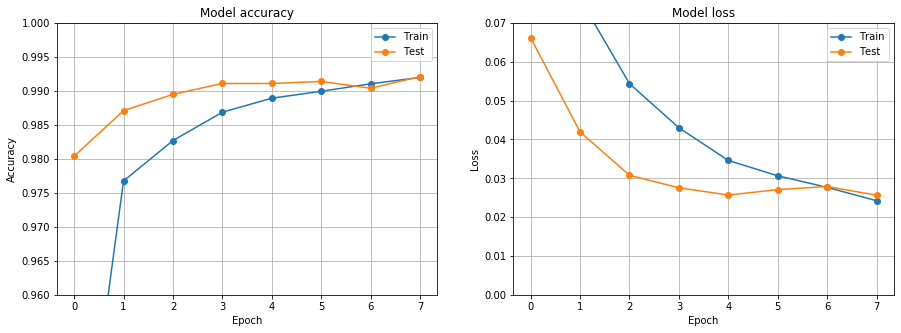

In [15]:
plot(history)

# 5/ Vérication de l'apprentissage avec le jeu de test

La méthode `predict`permet de demander au modèle sa prédic£tion pour une ou plusieurs entrées.<BR />
Exemple de prédition pour une image test numéro i dans le jeu d'images de test (0 <= i <= 10000) :

In [22]:
results = model.predict_on_batch(x_test)
bonne_rep = 0
for i, res in enumerate(results):
    bonne_rep += (np.argmax(res) == etiq_test[i])
print(f"taux de réussite : {bonne_rep/len(x_test)*100 : .2f} %")

model.test_on_batch(x_test, y_test)

taux de réussite :  98.98 %


[0.03099642, 0.9898]

**Si ton modèle est bon, tu devrez obtenir un taux de réussite aux alentours de 99% voir plus.<br />
Rappel : Le taux de réussite peut s'améliorer en augmentant le nombre d'epochs**

# 7/ Utiliser le réseau avec ses propres images

On va utiliser le réseau entrainé pour voir comment il réagit avec des chiffres "écrits à la main" différents des chiffres de la banque MNIST...<br />
Pour cela on utilise les images du dossier `chiffres` :

In [23]:
import os
images = ['chiffres/'+f for f in os.listdir('chiffres') if f.endswith(".png") or f.endswith(".jpg")]
images.sort()
print(f"Liste des images envoyées : {images}")

Liste des images envoyées : ['chiffres/0_jlc.png', 'chiffres/1_jlc.png', 'chiffres/2_jlc.png', 'chiffres/3_jlc.png', 'chiffres/4_jlc.png', 'chiffres/5_jlc.png', 'chiffres/6_jlc.png', 'chiffres/7_jlc.png', 'chiffres/8_jlc.png', 'chiffres/9_jlc.png']


### Lecture des fichiers image avec openCV

In [24]:
import cv2
# lecture des images -> matrices ndarray 28x28 
input_data = [255-cv2.cvtColor(cv2.imread(image),cv2.COLOR_BGR2GRAY) for image in images]
input_data = np.array(input_data)
input_data.shape, input_data.dtype  # on doit avoir 4 matrices de 28 x 28 valeurs 

((10, 28, 28), dtype('uint8'))

#### Visualistion des images :

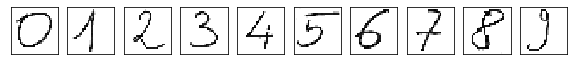

In [25]:
plt.figure(figsize=(12,4))
for i,M in enumerate(input_data):  
    plt.subplot(1,12,i+1)
    plt.imshow(input_data[i], cmap='binary', interpolation='none');
    plt.xticks([]); plt.yticks([])

Ajout de la dimension 'canal gris' et normalisation des images :

In [26]:
nb_images = input_data.shape[0]
# reshape des matrices + transformation en flots :
X_photo = input_data.reshape(nb_images, 28,28,1).astype('float32')
# normalisation des données :
X_photo /= 255

In [27]:
rep = model.predict(X_photo)
with np.printoptions(formatter={'float': '{:0.4f}'.format}): print(rep)

[[0.9881 0.0000 0.0103 0.0005 0.0000 0.0001 0.0002 0.0000 0.0000 0.0009]
 [0.0001 0.2995 0.0002 0.0000 0.6916 0.0010 0.0002 0.0030 0.0001 0.0042]
 [0.0003 0.0094 0.9899 0.0000 0.0001 0.0000 0.0001 0.0000 0.0002 0.0000]
 [0.0000 0.0000 0.0000 0.9999 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000]
 [0.0001 0.0001 0.0002 0.0000 0.9984 0.0003 0.0001 0.0006 0.0000 0.0003]
 [0.0000 0.0000 0.0000 0.0115 0.0000 0.9528 0.0000 0.0001 0.0005 0.0352]
 [0.0000 0.0000 0.0000 0.0005 0.0001 0.9079 0.0903 0.0000 0.0012 0.0000]
 [0.0000 0.0037 0.1529 0.0000 0.2202 0.0000 0.0000 0.6221 0.0010 0.0000]
 [0.0002 0.0002 0.0001 0.0003 0.0014 0.8649 0.0104 0.0001 0.1224 0.0000]
 [0.0000 0.5899 0.0002 0.3388 0.0001 0.0103 0.0000 0.0556 0.0001 0.0051]]


In [28]:
[r.argmax() for r in model.predict(X_photo)]

[0, 4, 2, 3, 4, 5, 5, 7, 5, 1]